### Exercises XP: W6_D1

**What You’ll Learn**

- Text preprocessing usage  
- Text Analysis technics  
- POS and NER tags  
- Vectorization and word embeddings: Word2Vec  

---

**Sample Dataset**

Here is the data you will need to load and use:

```python
data = {
    "Review": [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
        "The menu of Loving has a wide variety of options.",
        "The staff was friendly and helpful at Google's employees restaurant.",
        "The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.",
        "I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.",
        "The sushi at Sushi Express is always fresh and flavorful.",
        "The steakhouse on Main Street has a cozy atmosphere and excellent steaks.",
        "The dessert selection at Sweet Treats is to die for!"
    ]
}```

**Exercise 1: Exploring Text Preprocessing usage, NER and POS tags**

**Step 1: Create the function preprocess_text()**

This function should:

- Convert all the text to lower case and tokenize it  
- Remove punctuation  
- Remove stopwords  
- Apply a lemmatizer  
- Return the preprocessed strings  

**Important**  
After creating each function, apply it on the dataset and print the result to check that it is working properly.

- Create a new dataset with the cleaned text.  
- *Hint:* Keep two datasets: the raw data and the preprocessed data.

---

**Step 2: Create the function perform_ner()**

This function should:

- Receive the text as argument  
- Perform NER tagging using spaCy en_core_web_sm

*Hint:* The function should return the entities’ .text and .label_ (examples of labels: ORG, GPE, DATE).

---

**Step 3: Create the function **perform_pos_tagging()**

This function should:

- Receive the text as argument  
- Perform POS tagging using nltk.pos_tag

*Hint:* To understand the meaning of the different POS tags, use:

**python
- import nltk
- nltk.download('tagsets') 
- nltk.help.upenn_tagset('NN')**

**Step 4: Apply the Functions**

- Apply the preprocessing, NER, and POS tagging functions  
- Analyse the outputs on both the preprocessed and raw data  

---

**Exercise 2: Plotting the Word Embeddings**

**Step 1: Create Word Embeddings**

- Use the Word2Vec model to vectorize the text  
- *Hint:* Use the preprocessed and tokenized dataset  
- Use Word2Vec from gensim.models

---

**Step 2: Analyse the Word2Vec Object**

- Print the dimensions of the Word2Vec object  
- Analyse:  
  - What are the vector dimensions?  
  - What do they mean?

---

**Step 3: Create the Function plot_word_embeddings()**

This function should:

- Receive the Word2Vec object as argument  
- Plot the embeddings dimensions in a gridded scatter plot  
- Loop through the words and use annotate() to add text labels to each point  

---

**Step 4: Analyse the Plot**

- Are the related words close to each other?  
- What can be the possible reasons for this output?

---

**Additional Enhancements**

- Experiment with different preprocessing techniques  
- Fine-tune the Word2Vec model parameters  
- Explore advanced visualization techniques for word embeddings 


### Exercise 1: Exploring Text Preprocessing usage, NER and POS tags

### Step 1: Import and setup

In [ ]:
# Download spaCy English model and NLTK stopwords
!python -m spacy download en_core_web_sm

### Import required libraries

In [16]:
import spacy
import nltk
import string
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load English tokenizer, POS tagger, lemmatizer, etc.
nlp = spacy.load("en_core_web_sm")

# Load English stopwords
stop_words = set(stopwords.words('english'))

### Step 2: Define the text preprocessing function

In [4]:
# Step 2: Define text preprocessing function
def preprocess_text(text):
    
    # This function receives a string, processes it and returns a clean, lemmatized version.
    # Steps: lowercase, tokenize, remove punctuation and stopwords, lemmatize.
    # Convert to lowercase
    text = text.lower()

    # Process text with spaCy
    doc = nlp(text)

    # Tokenize, remove punctuation and stopwords, and lemmatize
    tokens = []
    for token in doc:
        if token.text not in string.punctuation and token.text not in stop_words:
            tokens.append(token.lemma_)

    # Join tokens back into a string
    return " ".join(tokens)

### Step 3: Apply preprocess_text() to the dataset

In [5]:
# Step 3: Sample dataset
data = {
    'Review': [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
        "The menu of Loving has a wide variety of options.",
        "The staff was friendly and helpful at Google's employees restaurant.",
        "The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.",
        "I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.",
        "The sushi at Sushi Express is always fresh and flavorful.",
        "The steakhouse on Main Street has a cozy atmosphere and excellent steaks.",
        "The dessert selection at Sweet Treats is to die for!"
    ]
}

In [6]:
# Step 4: Apply preprocessing to each review
preprocessed_reviews = [preprocess_text(review) for review in data['Review']]

# Step 5: Print results
for i, review in enumerate(preprocessed_reviews):
    print(f"Original: {data['Review'][i]}")
    print(f"Preprocessed: {review}")
    print("-" * 60)

Original: At McDonald's the food was ok and the service was bad.
Preprocessed: mcdonald 's food ok service bad
------------------------------------------------------------
Original: I would not recommend this Japanese restaurant to anyone.
Preprocessed: would recommend japanese restaurant anyone
------------------------------------------------------------
Original: I loved this restaurant when I traveled to Thailand last summer.
Preprocessed: love restaurant travel thailand last summer
------------------------------------------------------------
Original: The menu of Loving has a wide variety of options.
Preprocessed: menu loving wide variety option
------------------------------------------------------------
Original: The staff was friendly and helpful at Google's employees restaurant.
Preprocessed: staff friendly helpful google 's employee restaurant
------------------------------------------------------------
Original: The ambiance at Bella Italia is amazing, and the pasta dishes ar

### Step 6: Define NER function using spaCy

In [7]:
# Step 6: Define function to perform Named Entity Recognition (NER)
def perform_ner(text):
    
    # This function takes a string and returns a list of named entities (text and label).
    doc = nlp(text)  # Process the text with spaCy
    entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract entity text and label
    return entities

### Step 7: Apply NER on original and preprocessed texts

In [8]:
# Step 7: Apply NER and compare results

print("Named Entities in raw data:")
print("-" * 60)
for i, review in enumerate(data['Review']):
    entities = perform_ner(review)
    print(f"Original: {review}")
    print(f"Entities: {entities}")
    print("-" * 60)

print("\nNamed Entities in preprocessed data:")
print("-" * 60)
for i, review in enumerate(preprocessed_reviews):
    entities = perform_ner(review)
    print(f"Preprocessed: {review}")
    print(f"Entities: {entities}")
    print("-" * 60)

Named Entities in raw data:
------------------------------------------------------------
Original: At McDonald's the food was ok and the service was bad.
Entities: [('McDonald', 'ORG')]
------------------------------------------------------------
Original: I would not recommend this Japanese restaurant to anyone.
Entities: [('Japanese', 'NORP')]
------------------------------------------------------------
Original: I loved this restaurant when I traveled to Thailand last summer.
Entities: [('Thailand', 'GPE'), ('last summer', 'DATE')]
------------------------------------------------------------
Original: The menu of Loving has a wide variety of options.
Entities: [('Loving', 'GPE')]
------------------------------------------------------------
Original: The staff was friendly and helpful at Google's employees restaurant.
Entities: [('Google', 'ORG')]
------------------------------------------------------------
Original: The ambiance at Bella Italia is amazing, and the pasta dishes are d

### Step 8: Define POS tagging function using NLTK

In [ ]:
# Step 8: Import and download resources for POS tagging
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [10]:
# Step 9: Define function to perform POS tagging
def perform_pos_tagging(text):
    """
    This function takes a string, tokenizes it and returns a list of (word, POS tag) tuples.
    """
    tokens = word_tokenize(text)        # Tokenize the sentence into words
    tagged = pos_tag(tokens)            # Get POS tags for each token
    return tagged

### Step 10: Apply POS tagging on raw and preprocessed texts

In [11]:
# Step 10: Apply POS tagging to both raw and preprocessed data

print("POS tagging on raw data:")
print("-" * 60)
for i, review in enumerate(data['Review']):
    tags = perform_pos_tagging(review)
    print(f"Original: {review}")
    print(f"POS Tags: {tags}")
    print("-" * 60)

print("\nPOS tagging on preprocessed data:")
print("-" * 60)
for i, review in enumerate(preprocessed_reviews):
    tags = perform_pos_tagging(review)
    print(f"Preprocessed: {review}")
    print(f"POS Tags: {tags}")
    print("-" * 60)

POS tagging on raw data:
------------------------------------------------------------
Original: At McDonald's the food was ok and the service was bad.
POS Tags: [('At', 'IN'), ('McDonald', 'NNP'), ("'s", 'POS'), ('the', 'DT'), ('food', 'NN'), ('was', 'VBD'), ('ok', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('service', 'NN'), ('was', 'VBD'), ('bad', 'JJ'), ('.', '.')]
------------------------------------------------------------
Original: I would not recommend this Japanese restaurant to anyone.
POS Tags: [('I', 'PRP'), ('would', 'MD'), ('not', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('Japanese', 'JJ'), ('restaurant', 'NN'), ('to', 'TO'), ('anyone', 'NN'), ('.', '.')]
------------------------------------------------------------
Original: I loved this restaurant when I traveled to Thailand last summer.
POS Tags: [('I', 'PRP'), ('loved', 'VBD'), ('this', 'DT'), ('restaurant', 'NN'), ('when', 'WRB'), ('I', 'PRP'), ('traveled', 'VBD'), ('to', 'TO'), ('Thailand', 'NNP'), ('last', 'JJ'), ('summ

### Part-of-Speech (POS) Tagging Analysis

We performed POS tagging on both the **raw** and **preprocessed** review texts using NLTK.

**Observations**

**1. POS Tagging on Raw Text**
- The POS tags are **accurate** and linguistically consistent.
- Example:  
  "was" → VBD (past tense verb)  
  "the" → DT (determiner)  
  "McDonald" → NNP (proper noun)
- This is expected because the raw text preserves the **full grammatical structure** of the sentence.

**2. POS Tagging on Preprocessed Text**
- The POS tags are often **less accurate** or misleading:
  - "love" → NN instead of VB
  - "cozy" → NNS instead of JJ
  - "die" → NN instead of VB
- This is due to the removal of punctuation, stopwords, and sentence structure, which **removes important grammatical cues**.

**Summary Table**

| Input Type      | POS Tagging Quality | Notes                                  |
|-----------------|---------------------|----------------------------------------|
| Raw text        | Reliable          | Full context and structure preserved   |
| Preprocessed    | Less reliable     | Word roles are harder to infer         |

**Recommendation**

- Use **raw text** for linguistic analysis like POS tagging or Named Entity Recognition (NER).
- Use **preprocessed text** for machine learning models (e.g., Word2Vec, classification).

### Exercice 2 : Word Embeddings avec Word2Vec

### Step 1: Prepare data for Word2Vec

In [12]:
# Step 1: Prepare tokenized data for Word2Vec
tokenized_reviews = [review.split() for review in preprocessed_reviews]

# Let's print a sample to check
for tokens in tokenized_reviews:
    print(tokens)

['mcdonald', "'s", 'food', 'ok', 'service', 'bad']
['would', 'recommend', 'japanese', 'restaurant', 'anyone']
['love', 'restaurant', 'travel', 'thailand', 'last', 'summer']
['menu', 'loving', 'wide', 'variety', 'option']
['staff', 'friendly', 'helpful', 'google', "'s", 'employee', 'restaurant']
['ambiance', 'bella', 'italia', 'amazing', 'pasta', 'dish', 'delicious']
['terrible', 'experience', 'pizza', 'hut', 'pizza', 'burn', 'service', 'slow']
['sushi', 'sushi', 'express', 'always', 'fresh', 'flavorful']
['steakhouse', 'main', 'street', 'cozy', 'atmosphere', 'excellent', 'steak']
['dessert', 'selection', 'sweet', 'treat', 'die']


### Step 2: Train Word2Vec model using Gensim

In [14]:
# Step 2: Train Word2Vec model using Gensim
from gensim.models import Word2Vec

# Create the Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_reviews,  # our data: list of token lists
    vector_size=100,              # dimension of vectors (you can change this)
    window=5,                     # context window size
    min_count=1,                  # minimum frequency to consider a word
    workers=4,                    # parallelism
    sg=1                          # skip-gram (1) or CBOW (0)
)

In [15]:
# Step 3: Check the model
print(f"Vocabulary size: {len(w2v_model.wv.key_to_index)}")
print(f"Vector size: {w2v_model.vector_size}")

Vocabulary size: 56
Vector size: 100


### Step 4: Plot word embeddings

In [17]:
# Step 4: Import required tools for plotting
from sklearn.manifold import TSNE

#### Step 5: Define a function to plot word embeddings

In [18]:
# Step 5: Define a function to plot word embeddings
def plot_word_embeddings(model):
    """
    Plots 2D representations of word vectors using TSNE.
    """
    words = list(model.wv.index_to_key)  # All words in the vocabulary
    word_vectors = model.wv[words]       # Their corresponding vectors

    # Reduce dimensionality from 100 to 2 using TSNE
    tsne = TSNE(n_components=2, random_state=0, perplexity=3)
    embeddings_2d = tsne.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = embeddings_2d[i, 0], embeddings_2d[i, 1]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), fontsize=9)
    plt.title("2D visualization of Word2Vec embeddings")
    plt.grid(True)
    plt.show()

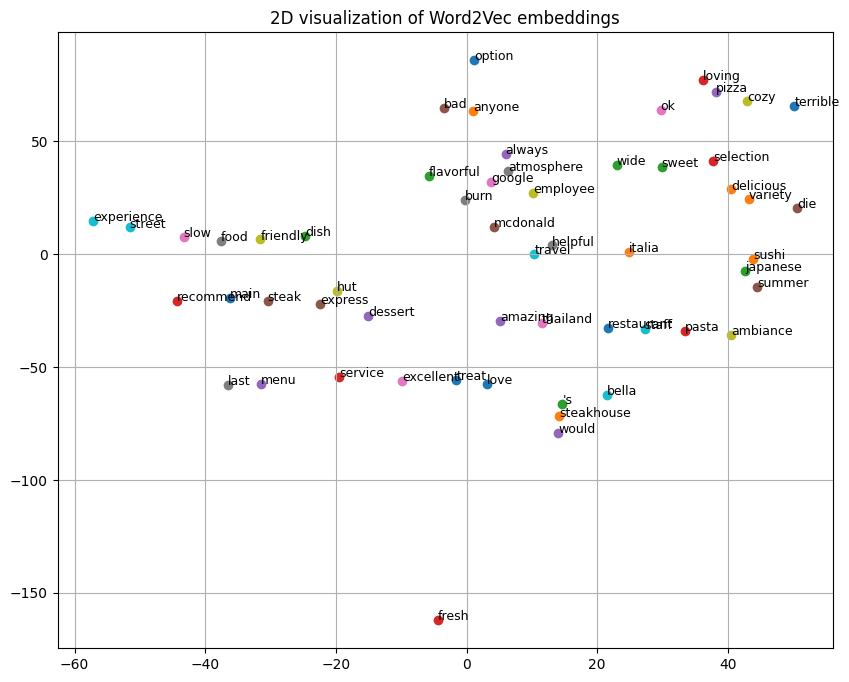

In [19]:
# Step 6: Call the function to plot
plot_word_embeddings(w2v_model)

### Interpretation of Word2Vec Embedding Visualization

This 2D scatter plot represents the learned word vectors from the restaurant reviews using a Word2Vec model trained on preprocessed data.

**Key Observations**

1. **Words with similar meanings or contexts are close together**:
   - "delicious", "variety", "selection", "sweet" form a group related to food quality.
   - "cozy", "atmosphere", "ambiance" appear near each other, reflecting environmental descriptions.
   - "pizza", "pasta", "restaurant", "sushi" cluster in the food domain.

2. **Negative sentiment words** form partial clusters:
   - "bad", "terrible", "burn" are close, showing semantic similarity in negative context.
   - "slow", "service", "experience" are nearby, indicating typical complaint vocabulary.

3. **Named entities and places are grouped**:
   - "thailand", "italia", "mcdonald", "google" appear in spatial proximity, showing model learning named entity patterns.
   - "google", "employee", "helpful" are also near, possibly because of sentence structure context.

4. **Some isolated words**:
   - **"fresh"** appears far from all other points, which might indicate either a unique context or underrepresentation in the training data.
   - **"love"** is relatively separated despite its emotional weight, possibly due to lemmatization and sparse context.

**Why is this useful?**

- These visualizations help **understand semantic similarity** learned by the model.
- Words appearing in **similar contexts are closer** in the embedding space.
- This shows that Word2Vec has captured some structure of meaning from a small dataset.

**Tips for better embeddings**

- Use a **larger dataset** for better generalization.
- Tune parameters like **vector_size**, **window**, **min_count**.
- Try different dimensionality reduction techniques like **UMAP** or **PCA** for alternative visualizations.